<a href="https://colab.research.google.com/github/reis-g/Machine-Learning/blob/main/Reconhecimento_Facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import os
dataset_path = '/content/drive/My Drive/Colab Notebooks/Reconhecimento facial/dataset'
print(os.listdir(dataset_path))


['Fran', 'Guilherme', 'Isabela ']


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255, # Normalize pixel values to [0, 1]
    validation_split=0.2 # Split data into training and validation sets
)

train_data = datagen.flow_from_directory(
    '/content/drive/My Drive/Colab Notebooks/Reconhecimento facial/dataset',
    target_size=(224, 224),
    batch_size=32,
    subset='training' # Use the training set
)

val_data = datagen.flow_from_directory(
    '/content/drive/My Drive/Colab Notebooks/Reconhecimento facial/dataset',
    target_size=(224, 224),
    batch_size=32,
    subset='validation' # Use the validation set
)

Found 15 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


In [9]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Congela as camadas pré-treinadas

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')  # Saída com número de classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, validation_data=val_data, epochs=10)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - accuracy: 0.4000 - loss: 1.1960 - val_accuracy: 0.3333 - val_loss: 21.0711
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2667 - loss: 21.6088 - val_accuracy: 0.3333 - val_loss: 9.3426
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4000 - loss: 6.8446 - val_accuracy: 0.3333 - val_loss: 7.7461
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.3333 - loss: 6.7057 - val_accuracy: 0.3333 - val_loss: 5.8439
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3333 - loss: 4.4160 - val_accuracy: 0.3333 - val_loss: 8.3503
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.4000 - loss: 4.7903 - val_accuracy: 0.3333 - val_loss: 7.4665
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.4000 - loss: 3.9148 - val_accuracy: 0.0000e+00 - val_loss: 2.1332
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.6000 - loss: 0.6525 - val_accuracy: 0.3333 - val_loss: 3.6790
Epoch 9/10
1/1 ━━━━

In [10]:
model.save('RecFac.keras')


Classes detectadas: ['Fran', 'Guilherme', 'Isabela ']
Classes detectadas: ['Fran', 'Guilherme', 'Isabela ']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


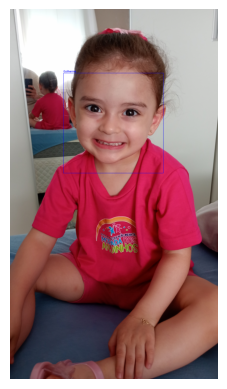

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Pessoa detectada: Guilherme


In [18]:
# Instale as bibliotecas necessárias
!pip install tensorflow opencv-python opencv-python-headless

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
import os

# Caminho do dataset e classes
dataset_path = '/content/drive/My Drive/Colab Notebooks/Reconhecimento facial/dataset'
class_names = sorted(os.listdir(dataset_path))  # Ordena alfabeticamente

# Verificar as classes para depuração
print("Classes detectadas:", class_names)

# Função para realizar a detecção e reconhecimento facial
def detectar_e_reconhecer(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (224, 224))
        face_array = preprocess_input(np.expand_dims(face_resized, axis=0))

        prediction = model.predict(face_array)
        classe_index = np.argmax(prediction)

        try:
            classe_name = class_names[classe_index]
        except IndexError:
            classe_name = "Classe desconhecida"

        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, classe_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    return frame

# Caminho do dataset e classes
dataset_path = '/content/drive/My Drive/Colab Notebooks/Reconhecimento facial/dataset'
class_names = sorted(os.listdir(dataset_path))  # Ordena alfabeticamente

# Verificar as classes para depuração
print("Classes detectadas:", class_names)

# Função para realizar a detecção e reconhecimento facial
def detectar_e_reconhecer(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (224, 224))
        face_array = preprocess_input(np.expand_dims(face_resized, axis=0))

        prediction = model.predict(face_array)
        classe_index = np.argmax(prediction)

        try:
            classe_name = class_names[classe_index]
        except IndexError:
            classe_name = "Classe desconhecida"

        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, classe_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    return frame



# Carregar uma imagem de teste
image_path = "/content/drive/My Drive/Colab Notebooks/Reconhecimento facial/test_image.jpg"
frame = cv2.imread(image_path)

if frame is None:
    print("Erro ao carregar a imagem.")
else:
    processed_frame = detectar_e_reconhecer(frame)
    show_image(processed_frame)

    gray = cv2.cvtColor(processed_frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) > 0:
        (x, y, w, h) = faces[0]
        face = processed_frame[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (224, 224))
        input_image = preprocess_input(np.expand_dims(face_resized, axis=0))

        predictions = model.predict(input_image)
        predicted_class = class_names[np.argmax(predictions)]

        print(f"Pessoa detectada: {predicted_class}")
    else:
        print("Nenhuma face detectada na imagem.")
